### Homework 1 Question 2


In [1]:
# Import relevant packages
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

Number who didnt default:  6636
Number who did default:  23364


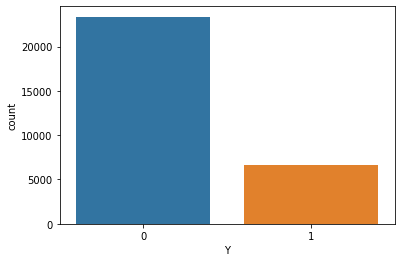

In [10]:
# Load data and plotting histogram 
df = pd.read_excel(r'/Users/benshi/Downloads/default_data.xls').drop([0])
df = df.iloc[:,1:]
Y1 = df['Y']
ax = sns.countplot(x=Y1, label="Count")
NB, B = Y1.value_counts()
print('Number who didnt default: ', B)
print('Number who did default: ', NB)

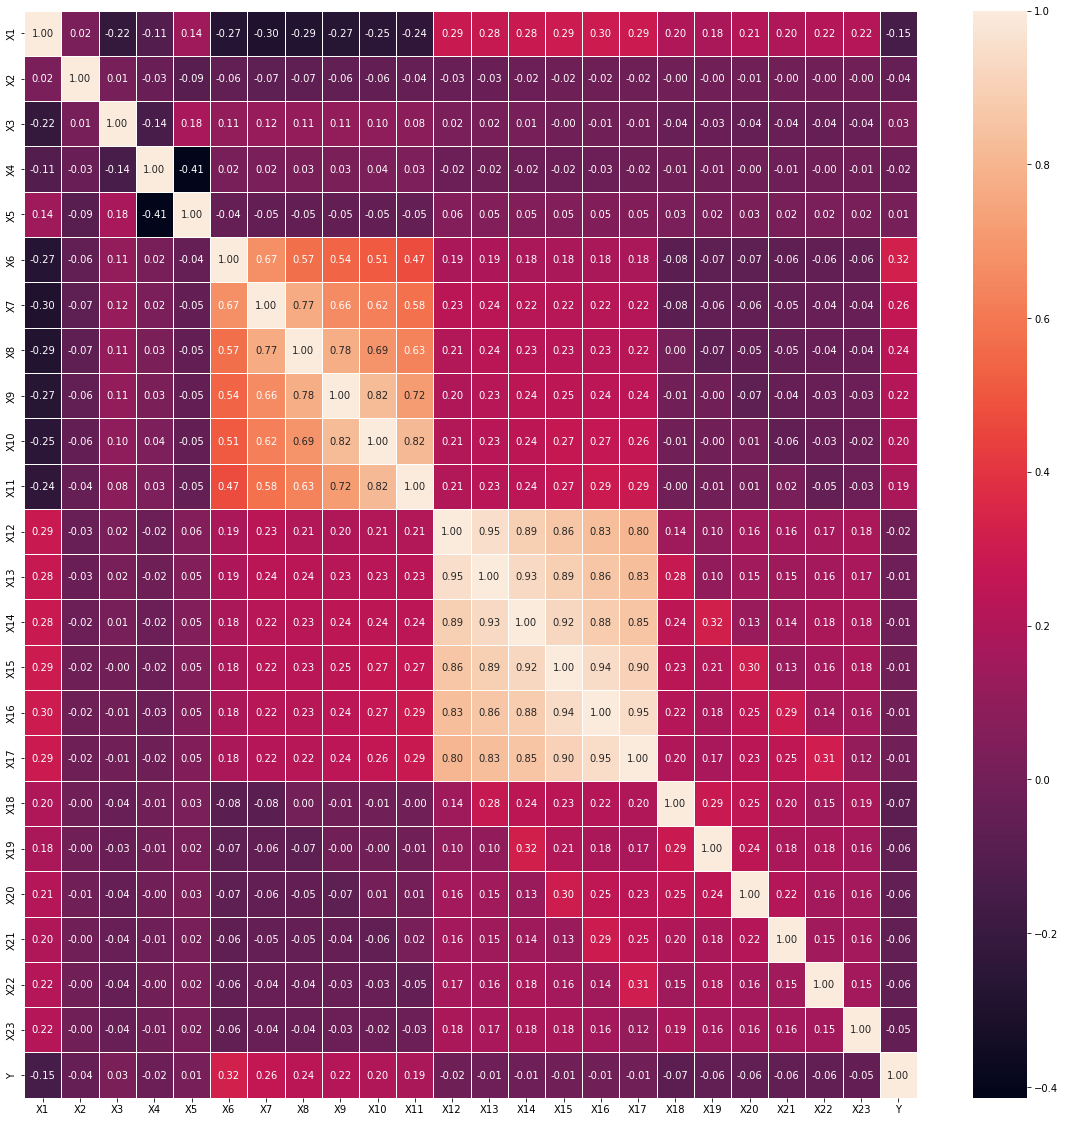

In [11]:
# Making the correlation matrix
plt.figure(figsize=(20, 20))
sns.heatmap(df.astype('float64').corr(), annot=True, linewidths=.5, fmt= '.2f')
plt.show()

# This matrix can tell us to what degree each variable affects each other variable: however, in this case we are
# more interested in to what degree each variable affects whether someone defaults, which is given by the last 
# column in the matrix. From this we can see that the 5 most correlated variables are: X6, X7, X8, X9 and X10

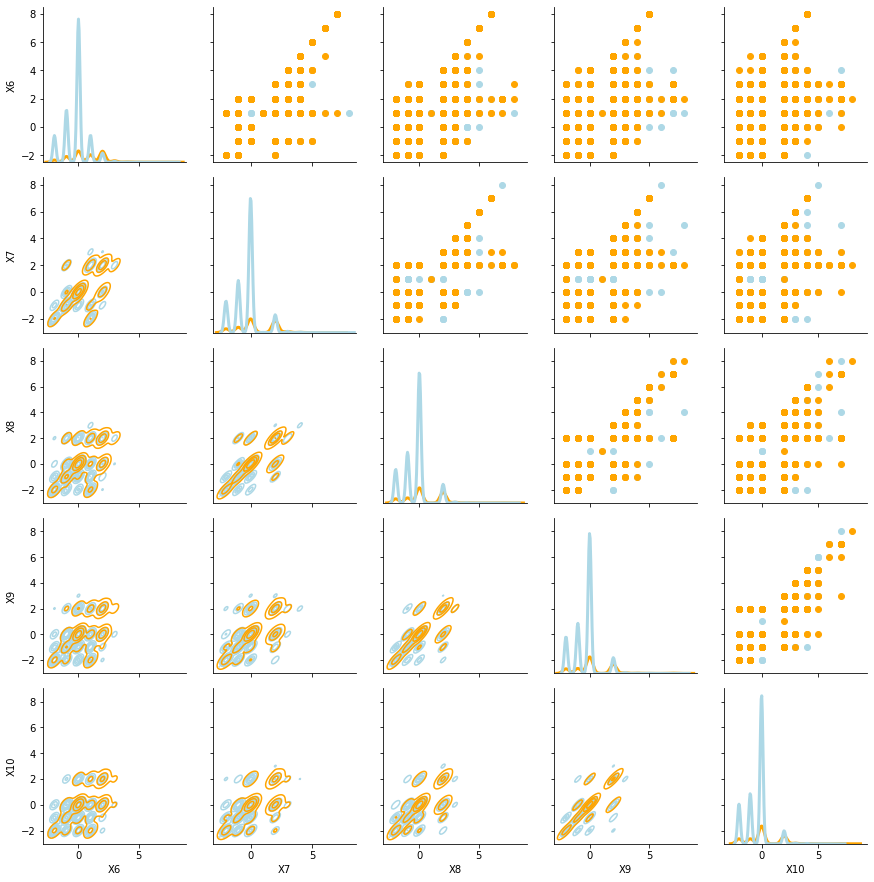

In [16]:
# Producing the pairs plot
df1 = df.clip(lower=df.quantile(0.02), upper=df.quantile(0.98), axis=1)
data2 = df[['X6', 'X7', 'X8', 'X9', 'X10', 'Y']]

c_palette = {0:'lightblue', 1:'orange'}
g = sns.PairGrid(data2, hue='Y', palette=c_palette)
g.map_upper(plt.scatter)  
g.map_diag(sns.kdeplot, lw=3)  
g.map_lower(sns.kdeplot)  

plt.show()

# From these pairs plot, we can see through the scatter plot that there isn't exactly a prominent relationship 
# between any of the variables: From the lower section kernel density plots, it seems that the variables plotted 
# are similarly ambiguous in predicting default: both the orange and the blue tend to overlap alot, signifying 
# that the both defaulters and no defaulters have similar values for these variables. However, by the same token,
# there are a decent amount of areas with just blue circles, meaning that for these values, the variable
# serves as an alright predictor. Through the diagonal, density plots, we see that the peaks between default and 
# no default overlap, which also means that there isn't too much of a difference between. 

In [12]:
# Performing the logistic regression
X = df.drop(['Y'], axis=1)
X = X.clip(lower=X.quantile(0.02), upper=X.quantile(0.98), axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = sm.add_constant(X)
Y = df['Y']

est = sm.Logit(Y.astype(float), X.astype(float)).fit()
est.summary2(float_format='%.3f')

Optimization terminated successfully.
         Current function value: 0.464620
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.121     
Dependent Variable: Y                AIC:              27925.2001
Date:               2021-09-23 22:04 BIC:              28124.6150
No. Observations:   30000            Log-Likelihood:   -13939.   
Df Model:           23               LL-Null:          -15853.   
Df Residuals:       29976            LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-------------------------------------------------------------------
          Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
-------------------------------------------------------------------
const    -1.4657     0.0166   -88.3299   0.0000   -1.4982   -1.4331
x1       -0.0989     0.0204    -4.8587   0.0000   -0.1388   -0.0590
x2       -0.0531     0.0150    -3.5408   0.0004   -0.0826   -0.0237
x3       -0.0803     0.0166    -4.8444   0.0000   -0.1128   -0.0478
x4       -0.0806     0.0165    -4.8687   0.0000   -0.1130   -0.0481
x5        0.0684     0.0164     4.1703   0.0000    0.0362    0.1005
x6        0.6489     0.0199    32.6324   0.0000    0.6099    0.6879
x7        0.0992     0.0242     4.1033   0.0000    0.0518    0.1465
x8        0.0863     0.0271     3.1915   0.0014    0.0333    0.1394
x9        0.0279     0.0292     0.9555   0.3393   -0.0294    0.0852
x10       0.0385     0.0305     1.2655   0.2057   -0.0211    0.0982
x11       0.0092     0.0254     0.3632   0.7164   -0.0406    0.0591
x12      -0.4044     0.0836    -4.8352   0.0000   -0.5684   -0.2405
x13       0.1677     0.1071     1.5663   0.1173   -0.0422    0.3776
x14       0.0947     0.0917     1.0320   0.3021   -0.0851    0.2745
x15      -0.0117     0.0868    -0.1350   0.8926   -0.1818    0.1584
x16       0.0374     0.0923     0.4053   0.6852   -0.1435    0.2184
x17       0.0235     0.0712     0.3296   0.7417   -0.1160    0.1629
x18      -0.2258     0.0382    -5.9131   0.0000   -0.3006   -0.1509
x19      -0.2216     0.0483    -4.5903   0.0000   -0.3161   -0.1270
x20      -0.0483     0.0303    -1.5917   0.1115   -0.1077    0.0112
x21      -0.0630     0.0280    -2.2542   0.0242   -0.1178   -0.0082
x22      -0.0506     0.0271    -1.8635   0.0624   -0.1038    0.0026
x23      -0.0367     0.0230    -1.5928   0.1112   -0.0818    0.0085
=================================================================

"""

In [ ]:
# Based on the P values calculated above, it seems that X1 - X8, X12, X18, X19, X21 are sigificant predictors for
# whether an individual will default, since their P values are below the threshold of 0.05. 